## 4.8 분류 실습 - 캐글 산탄데르 고객 만족 예측

### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./santander-customer-satisfaction/train.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [3]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [4]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [6]:

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [7]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.722196	validation_1-auc:0.727319
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.734603	validation_1-auc:0.738662
[2]	validation_0-auc:0.796928	validation_1-auc:0.800098
[3]	validation_0-auc:0.806833	validation_1-auc:0.81015
[4]	validation_0-auc:0.816995	validation_1-auc:0.818822
[5]	validation_0-auc:0.821748	validation_1-auc:0.822641
[6]	validation_0-auc:0.810257	validation_1-auc:0.81277
[7]	validation_0-auc:0.822836	validation_1-auc:0.822852
[8]	validation_0-auc:0.818518	validation_1-auc:0.818712
[9]	validation_0-auc:0.814963	validation_1-auc:0.816715
[10]	validation_0-auc:0.82194	validation_1-auc:0.821829
[11]	validation_0-auc:0.829371	validation_1-auc:0.828086
[12]	validation_0-auc:0.832189	validation_1-auc:0.831225
[13]	validation_0-auc:0.830629	validation_1-auc:0.829851
[14]	validation_0-auc:0.828153	validation_1-auc:0.827272
[

[52]	validation_0-auc:0.863611	validation_1-auc:0.845381
[53]	validation_0-auc:0.864192	validation_1-auc:0.845243
[54]	validation_0-auc:0.864882	validation_1-auc:0.845707
[55]	validation_0-auc:0.86562	validation_1-auc:0.845861
[56]	validation_0-auc:0.866257	validation_1-auc:0.845498
[57]	validation_0-auc:0.866719	validation_1-auc:0.845518
[58]	validation_0-auc:0.867255	validation_1-auc:0.845523
[59]	validation_0-auc:0.867511	validation_1-auc:0.845674
[60]	validation_0-auc:0.867636	validation_1-auc:0.845661
[61]	validation_0-auc:0.867903	validation_1-auc:0.845638
[62]	validation_0-auc:0.868208	validation_1-auc:0.845507
[63]	validation_0-auc:0.868561	validation_1-auc:0.845443
[64]	validation_0-auc:0.86904	validation_1-auc:0.845194
[65]	validation_0-auc:0.869445	validation_1-auc:0.845304
[66]	validation_0-auc:0.869603	validation_1-auc:0.845269
[67]	validation_0-auc:0.869929	validation_1-auc:0.845257
[68]	validation_0-auc:0.870117	validation_1-auc:0.845274
[69]	validation_0-auc:0.870285	va

[8]	validation_0-auc:0.818479	validation_1-auc:0.8205
[9]	validation_0-auc:0.815823	validation_1-auc:0.818436
[10]	validation_0-auc:0.822609	validation_1-auc:0.824762
[11]	validation_0-auc:0.829348	validation_1-auc:0.82959
[12]	validation_0-auc:0.832498	validation_1-auc:0.832727
[13]	validation_0-auc:0.830666	validation_1-auc:0.830731
[14]	validation_0-auc:0.827998	validation_1-auc:0.82782
[15]	validation_0-auc:0.831758	validation_1-auc:0.831711
[16]	validation_0-auc:0.829016	validation_1-auc:0.828572
[17]	validation_0-auc:0.833848	validation_1-auc:0.832973
[18]	validation_0-auc:0.837103	validation_1-auc:0.834978
[19]	validation_0-auc:0.834968	validation_1-auc:0.833152
[20]	validation_0-auc:0.837502	validation_1-auc:0.835256
[21]	validation_0-auc:0.839871	validation_1-auc:0.836407
[22]	validation_0-auc:0.837881	validation_1-auc:0.834743
[23]	validation_0-auc:0.836684	validation_1-auc:0.83293
[24]	validation_0-auc:0.836062	validation_1-auc:0.830675
[25]	validation_0-auc:0.835728	validat

[65]	validation_0-auc:0.866485	validation_1-auc:0.84497
[66]	validation_0-auc:0.866614	validation_1-auc:0.845099
[67]	validation_0-auc:0.866829	validation_1-auc:0.845173
[68]	validation_0-auc:0.866915	validation_1-auc:0.845099
[69]	validation_0-auc:0.867287	validation_1-auc:0.844977
[70]	validation_0-auc:0.867485	validation_1-auc:0.844851
[71]	validation_0-auc:0.867587	validation_1-auc:0.844836
[72]	validation_0-auc:0.867818	validation_1-auc:0.844689
[73]	validation_0-auc:0.868223	validation_1-auc:0.844662
[74]	validation_0-auc:0.868376	validation_1-auc:0.84466
[75]	validation_0-auc:0.868375	validation_1-auc:0.844816
[76]	validation_0-auc:0.868649	validation_1-auc:0.844663
[77]	validation_0-auc:0.868773	validation_1-auc:0.844507
[78]	validation_0-auc:0.868882	validation_1-auc:0.844326
[79]	validation_0-auc:0.869184	validation_1-auc:0.844543
[80]	validation_0-auc:0.869305	validation_1-auc:0.844425
[81]	validation_0-auc:0.869309	validation_1-auc:0.844324
[82]	validation_0-auc:0.869894	va

[12]	validation_0-auc:0.843086	validation_1-auc:0.834596
[13]	validation_0-auc:0.841885	validation_1-auc:0.832063
[14]	validation_0-auc:0.839414	validation_1-auc:0.830171
[15]	validation_0-auc:0.843245	validation_1-auc:0.833311
[16]	validation_0-auc:0.842171	validation_1-auc:0.83275
[17]	validation_0-auc:0.845713	validation_1-auc:0.834974
[18]	validation_0-auc:0.849395	validation_1-auc:0.836388
[19]	validation_0-auc:0.849167	validation_1-auc:0.835481
[20]	validation_0-auc:0.851581	validation_1-auc:0.836514
[21]	validation_0-auc:0.853706	validation_1-auc:0.836689
[22]	validation_0-auc:0.853303	validation_1-auc:0.835972
[23]	validation_0-auc:0.852616	validation_1-auc:0.835256
[24]	validation_0-auc:0.852494	validation_1-auc:0.83415
[25]	validation_0-auc:0.853764	validation_1-auc:0.833471
[26]	validation_0-auc:0.85706	validation_1-auc:0.834763
[27]	validation_0-auc:0.857653	validation_1-auc:0.833712
[28]	validation_0-auc:0.860129	validation_1-auc:0.835048
[29]	validation_0-auc:0.862393	val

[66]	validation_0-auc:0.890318	validation_1-auc:0.845615
[67]	validation_0-auc:0.890754	validation_1-auc:0.845474
[68]	validation_0-auc:0.890924	validation_1-auc:0.845484
[69]	validation_0-auc:0.891097	validation_1-auc:0.845349
[70]	validation_0-auc:0.891533	validation_1-auc:0.845401
[71]	validation_0-auc:0.891623	validation_1-auc:0.845404
[72]	validation_0-auc:0.891773	validation_1-auc:0.845554
[73]	validation_0-auc:0.892126	validation_1-auc:0.845354
[74]	validation_0-auc:0.892268	validation_1-auc:0.845465
[75]	validation_0-auc:0.892454	validation_1-auc:0.845305
[76]	validation_0-auc:0.892541	validation_1-auc:0.84522
[77]	validation_0-auc:0.892677	validation_1-auc:0.845043
[78]	validation_0-auc:0.8927	validation_1-auc:0.844914
[79]	validation_0-auc:0.893235	validation_1-auc:0.845048
[80]	validation_0-auc:0.893397	validation_1-auc:0.845059
[81]	validation_0-auc:0.893506	validation_1-auc:0.84483
[82]	validation_0-auc:0.893616	validation_1-auc:0.844919
[83]	validation_0-auc:0.894018	vali

[30]	validation_0-auc:0.859238	validation_1-auc:0.835852
[31]	validation_0-auc:0.858906	validation_1-auc:0.834612
[32]	validation_0-auc:0.861572	validation_1-auc:0.83528
[33]	validation_0-auc:0.863717	validation_1-auc:0.83664
[34]	validation_0-auc:0.866088	validation_1-auc:0.837614
[35]	validation_0-auc:0.866146	validation_1-auc:0.83654
[36]	validation_0-auc:0.867871	validation_1-auc:0.837326
[37]	validation_0-auc:0.869036	validation_1-auc:0.837411
[38]	validation_0-auc:0.869628	validation_1-auc:0.838214
[39]	validation_0-auc:0.86937	validation_1-auc:0.8381
[40]	validation_0-auc:0.869581	validation_1-auc:0.836706
[41]	validation_0-auc:0.870486	validation_1-auc:0.837672
[42]	validation_0-auc:0.871253	validation_1-auc:0.837963
[43]	validation_0-auc:0.871206	validation_1-auc:0.837668
[44]	validation_0-auc:0.871852	validation_1-auc:0.837554
[45]	validation_0-auc:0.872922	validation_1-auc:0.837962
[46]	validation_0-auc:0.873746	validation_1-auc:0.838434
[47]	validation_0-auc:0.874376	valida

[3]	validation_0-auc:0.827629	validation_1-auc:0.822513
[4]	validation_0-auc:0.833182	validation_1-auc:0.827282
[5]	validation_0-auc:0.837556	validation_1-auc:0.831815
[6]	validation_0-auc:0.83768	validation_1-auc:0.830178
[7]	validation_0-auc:0.840017	validation_1-auc:0.830901
[8]	validation_0-auc:0.84056	validation_1-auc:0.830401
[9]	validation_0-auc:0.83796	validation_1-auc:0.828919
[10]	validation_0-auc:0.842283	validation_1-auc:0.831753
[11]	validation_0-auc:0.845102	validation_1-auc:0.833467
[12]	validation_0-auc:0.847285	validation_1-auc:0.835862
[13]	validation_0-auc:0.846416	validation_1-auc:0.834329
[14]	validation_0-auc:0.845842	validation_1-auc:0.832728
[15]	validation_0-auc:0.848527	validation_1-auc:0.834553
[16]	validation_0-auc:0.848147	validation_1-auc:0.83319
[17]	validation_0-auc:0.84932	validation_1-auc:0.833953
[18]	validation_0-auc:0.851692	validation_1-auc:0.835299
[19]	validation_0-auc:0.851115	validation_1-auc:0.833694
[20]	validation_0-auc:0.852964	validation_1

[61]	validation_0-auc:0.865275	validation_1-auc:0.838813
[62]	validation_0-auc:0.865592	validation_1-auc:0.838593
Stopping. Best iteration:
[32]	validation_0-auc:0.851876	validation_1-auc:0.841669

[0]	validation_0-auc:0.727663	validation_1-auc:0.734372
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.741882	validation_1-auc:0.747952
[2]	validation_0-auc:0.804723	validation_1-auc:0.809334
[3]	validation_0-auc:0.816397	validation_1-auc:0.822663
[4]	validation_0-auc:0.827214	validation_1-auc:0.828968
[5]	validation_0-auc:0.829542	validation_1-auc:0.831684
[6]	validation_0-auc:0.827131	validation_1-auc:0.828829
[7]	validation_0-auc:0.831641	validation_1-auc:0.832476
[8]	validation_0-auc:0.830184	validation_1-auc:0.829312
[9]	validation_0-auc:0.827944	validation_1-auc:0.827707
[10]	validation_0-auc:0.833269	validation_1-auc:0.830851
[11]	validation_0-auc:0.8366

[55]	validation_0-auc:0.866304	validation_1-auc:0.843544
[56]	validation_0-auc:0.866553	validation_1-auc:0.843616
[57]	validation_0-auc:0.866795	validation_1-auc:0.843872
[58]	validation_0-auc:0.867316	validation_1-auc:0.843619
[59]	validation_0-auc:0.86765	validation_1-auc:0.843638
[60]	validation_0-auc:0.867923	validation_1-auc:0.84369
[61]	validation_0-auc:0.868444	validation_1-auc:0.843874
[62]	validation_0-auc:0.868736	validation_1-auc:0.843909
[63]	validation_0-auc:0.869042	validation_1-auc:0.84384
[64]	validation_0-auc:0.869042	validation_1-auc:0.843794
[65]	validation_0-auc:0.86944	validation_1-auc:0.843715
[66]	validation_0-auc:0.86947	validation_1-auc:0.843677
[67]	validation_0-auc:0.869942	validation_1-auc:0.843611
[68]	validation_0-auc:0.870405	validation_1-auc:0.843712
[69]	validation_0-auc:0.870499	validation_1-auc:0.843734
[70]	validation_0-auc:0.870804	validation_1-auc:0.843986
[71]	validation_0-auc:0.871152	validation_1-auc:0.843743
[72]	validation_0-auc:0.871315	valid

[47]	validation_0-auc:0.860568	validation_1-auc:0.842829
[48]	validation_0-auc:0.860771	validation_1-auc:0.843061
[49]	validation_0-auc:0.861174	validation_1-auc:0.842997
[50]	validation_0-auc:0.861631	validation_1-auc:0.842772
[51]	validation_0-auc:0.861823	validation_1-auc:0.842708
[52]	validation_0-auc:0.862002	validation_1-auc:0.842458
[53]	validation_0-auc:0.862319	validation_1-auc:0.842832
[54]	validation_0-auc:0.862826	validation_1-auc:0.842892
[55]	validation_0-auc:0.863019	validation_1-auc:0.842652
[56]	validation_0-auc:0.86337	validation_1-auc:0.842627
[57]	validation_0-auc:0.863849	validation_1-auc:0.842737
[58]	validation_0-auc:0.864376	validation_1-auc:0.842664
[59]	validation_0-auc:0.864511	validation_1-auc:0.842435
[60]	validation_0-auc:0.864688	validation_1-auc:0.842267
[61]	validation_0-auc:0.864882	validation_1-auc:0.842175
[62]	validation_0-auc:0.864916	validation_1-auc:0.842092
[63]	validation_0-auc:0.865011	validation_1-auc:0.842298
[64]	validation_0-auc:0.865366	v

[11]	validation_0-auc:0.840509	validation_1-auc:0.829917
[12]	validation_0-auc:0.84355	validation_1-auc:0.831179
[13]	validation_0-auc:0.843159	validation_1-auc:0.830125
[14]	validation_0-auc:0.845684	validation_1-auc:0.832238
[15]	validation_0-auc:0.84807	validation_1-auc:0.83324
[16]	validation_0-auc:0.849685	validation_1-auc:0.833491
[17]	validation_0-auc:0.852852	validation_1-auc:0.835663
[18]	validation_0-auc:0.855521	validation_1-auc:0.836071
[19]	validation_0-auc:0.856924	validation_1-auc:0.836165
[20]	validation_0-auc:0.857915	validation_1-auc:0.836488
[21]	validation_0-auc:0.859473	validation_1-auc:0.836885
[22]	validation_0-auc:0.859726	validation_1-auc:0.836637
[23]	validation_0-auc:0.8623	validation_1-auc:0.836985
[24]	validation_0-auc:0.86229	validation_1-auc:0.836806
[25]	validation_0-auc:0.862121	validation_1-auc:0.834963
[26]	validation_0-auc:0.864514	validation_1-auc:0.835991
[27]	validation_0-auc:0.866303	validation_1-auc:0.837437
[28]	validation_0-auc:0.867929	valida

[13]	validation_0-auc:0.848252	validation_1-auc:0.833174
[14]	validation_0-auc:0.850064	validation_1-auc:0.833886
[15]	validation_0-auc:0.851699	validation_1-auc:0.8337
[16]	validation_0-auc:0.853639	validation_1-auc:0.836571
[17]	validation_0-auc:0.855265	validation_1-auc:0.837226
[18]	validation_0-auc:0.857197	validation_1-auc:0.83755
[19]	validation_0-auc:0.858942	validation_1-auc:0.837819
[20]	validation_0-auc:0.860234	validation_1-auc:0.838916
[21]	validation_0-auc:0.861166	validation_1-auc:0.838648
[22]	validation_0-auc:0.862163	validation_1-auc:0.838665
[23]	validation_0-auc:0.864305	validation_1-auc:0.838695
[24]	validation_0-auc:0.864556	validation_1-auc:0.838893
[25]	validation_0-auc:0.865233	validation_1-auc:0.838877
[26]	validation_0-auc:0.86722	validation_1-auc:0.839005
[27]	validation_0-auc:0.868233	validation_1-auc:0.839398
[28]	validation_0-auc:0.869551	validation_1-auc:0.839568
[29]	validation_0-auc:0.871101	validation_1-auc:0.840029
[30]	validation_0-auc:0.872179	vali

[0]	validation_0-auc:0.741999	validation_1-auc:0.741155
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.758508	validation_1-auc:0.756758
[2]	validation_0-auc:0.819778	validation_1-auc:0.816795
[3]	validation_0-auc:0.82879	validation_1-auc:0.828789
[4]	validation_0-auc:0.836097	validation_1-auc:0.831973
[5]	validation_0-auc:0.838719	validation_1-auc:0.83322
[6]	validation_0-auc:0.839748	validation_1-auc:0.832214
[7]	validation_0-auc:0.842671	validation_1-auc:0.834254
[8]	validation_0-auc:0.842421	validation_1-auc:0.832504
[9]	validation_0-auc:0.841706	validation_1-auc:0.831978
[10]	validation_0-auc:0.845447	validation_1-auc:0.832981
[11]	validation_0-auc:0.848284	validation_1-auc:0.834528
[12]	validation_0-auc:0.849693	validation_1-auc:0.837056
[13]	validation_0-auc:0.849079	validation_1-auc:0.836137
[14]	validation_0-auc:0.850812	validation_1-auc:0.837939


[58]	validation_0-auc:0.882908	validation_1-auc:0.841244
[59]	validation_0-auc:0.883221	validation_1-auc:0.841175
[60]	validation_0-auc:0.883591	validation_1-auc:0.840955
[61]	validation_0-auc:0.884053	validation_1-auc:0.840837
Stopping. Best iteration:
[31]	validation_0-auc:0.869345	validation_1-auc:0.842085

[0]	validation_0-auc:0.743258	validation_1-auc:0.744569
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.76464	validation_1-auc:0.76518
[2]	validation_0-auc:0.82337	validation_1-auc:0.819519
[3]	validation_0-auc:0.837328	validation_1-auc:0.831797
[4]	validation_0-auc:0.8431	validation_1-auc:0.835868
[5]	validation_0-auc:0.846908	validation_1-auc:0.836039
[6]	validation_0-auc:0.847395	validation_1-auc:0.83453
[7]	validation_0-auc:0.85038	validation_1-auc:0.835548
[8]	validation_0-auc:0.849244	validation_1-auc:0.834348
[9]	validation_0-auc:0.847978	vali

In [8]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.754936	validation_1-auc:0.758685
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.816309	validation_1-auc:0.818612
[2]	validation_0-auc:0.832377	validation_1-auc:0.825469
[3]	validation_0-auc:0.835699	validation_1-auc:0.827201
[4]	validation_0-auc:0.837036	validation_1-auc:0.826927
[5]	validation_0-auc:0.838754	validation_1-auc:0.829516
[6]	validation_0-auc:0.838411	validation_1-auc:0.829388
[7]	validation_0-auc:0.837209	validation_1-auc:0.828496
[8]	validation_0-auc:0.838379	validation_1-auc:0.829074
[9]	validation_0-auc:0.839918	validation_1-auc:0.830259
[10]	validation_0-auc:0.840608	validation_1-auc:0.830566
[11]	validation_0-auc:0.841077	validation_1-auc:0.830736
[12]	validation_0-auc:0.841115	validation_1-auc:0.830507
[13]	validation_0-auc:0.841996	validation_1-auc:0.830161
[14]	validation_0-auc:0.843269	validation_1-auc:0.8317

[141]	validation_0-auc:0.87817	validation_1-auc:0.843924
[142]	validation_0-auc:0.878493	validation_1-auc:0.843879
[143]	validation_0-auc:0.878548	validation_1-auc:0.844073
[144]	validation_0-auc:0.878845	validation_1-auc:0.844231
[145]	validation_0-auc:0.879052	validation_1-auc:0.844229
[146]	validation_0-auc:0.879227	validation_1-auc:0.844395
[147]	validation_0-auc:0.879534	validation_1-auc:0.844335
[148]	validation_0-auc:0.879802	validation_1-auc:0.844226
[149]	validation_0-auc:0.880027	validation_1-auc:0.844266
[150]	validation_0-auc:0.880092	validation_1-auc:0.844229
[151]	validation_0-auc:0.880251	validation_1-auc:0.844389
[152]	validation_0-auc:0.880574	validation_1-auc:0.844398
[153]	validation_0-auc:0.880877	validation_1-auc:0.84454
[154]	validation_0-auc:0.88103	validation_1-auc:0.844653
[155]	validation_0-auc:0.881268	validation_1-auc:0.844684
[156]	validation_0-auc:0.881561	validation_1-auc:0.844866
[157]	validation_0-auc:0.881657	validation_1-auc:0.844824
[158]	validation_

[283]	validation_0-auc:0.902996	validation_1-auc:0.844833
[284]	validation_0-auc:0.90315	validation_1-auc:0.844889
[285]	validation_0-auc:0.903228	validation_1-auc:0.844851
[286]	validation_0-auc:0.903394	validation_1-auc:0.844876
[287]	validation_0-auc:0.903468	validation_1-auc:0.844839
[288]	validation_0-auc:0.903565	validation_1-auc:0.844866
[289]	validation_0-auc:0.903645	validation_1-auc:0.844876
[290]	validation_0-auc:0.903714	validation_1-auc:0.844806
[291]	validation_0-auc:0.903815	validation_1-auc:0.844783
[292]	validation_0-auc:0.903861	validation_1-auc:0.84477
[293]	validation_0-auc:0.903964	validation_1-auc:0.844719
[294]	validation_0-auc:0.904021	validation_1-auc:0.844734
[295]	validation_0-auc:0.904096	validation_1-auc:0.844732
[296]	validation_0-auc:0.904163	validation_1-auc:0.844671
[297]	validation_0-auc:0.904241	validation_1-auc:0.844682
[298]	validation_0-auc:0.904293	validation_1-auc:0.84465
[299]	validation_0-auc:0.904415	validation_1-auc:0.844608
[300]	validation_

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

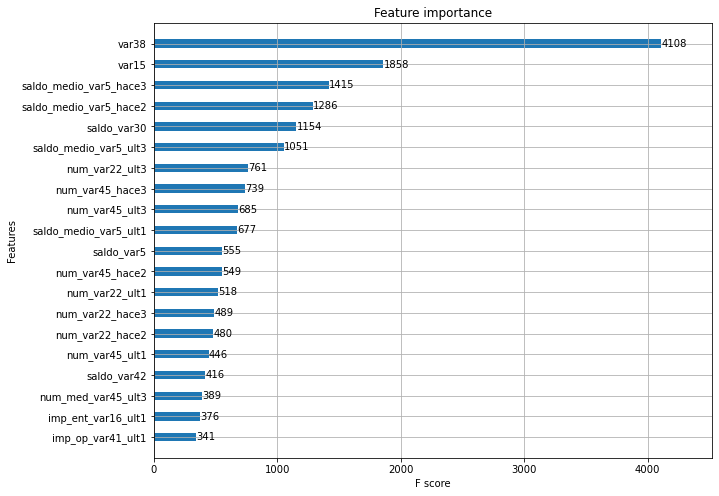

In [9]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [13]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

[27]	valid_0's auc: 0.872513	valid_0's binary_logloss: 0.124859	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.139648
[28]	valid_0's auc: 0.873252	valid_0's binary_logloss: 0.124586	valid_1's auc: 0.839378	valid_1's binary_logloss: 0.139578
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[30]	valid_0's auc: 0.874647	valid_0's binary_logloss: 0.124019	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.13958
[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 

[34]	valid_0's auc: 0.876841	valid_0's binary_logloss: 0.123372	valid_1's auc: 0.839078	valid_1's binary_logloss: 0.139459
[35]	valid_0's auc: 0.877422	valid_0's binary_logloss: 0.123118	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139362
[36]	valid_0's auc: 0.878163	valid_0's binary_logloss: 0.122873	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.139395
[37]	valid_0's auc: 0.87856	valid_0's binary_logloss: 0.122649	valid_1's auc: 0.839051	valid_1's binary_logloss: 0.139443
[38]	valid_0's auc: 0.879102	valid_0's binary_logloss: 0.122415	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139378
[39]	valid_0's auc: 0.879978	valid_0's binary_logloss: 0.122126	valid_1's auc: 0.83945	valid_1's binary_logloss: 0.139391
[40]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.121938	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.139314
[41]	valid_0's auc: 0.880914	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.13937
[42]	valid_0's auc:

[9]	valid_0's auc: 0.852419	valid_0's binary_logloss: 0.135296	valid_1's auc: 0.837736	valid_1's binary_logloss: 0.145412
[10]	valid_0's auc: 0.85454	valid_0's binary_logloss: 0.134224	valid_1's auc: 0.838661	valid_1's binary_logloss: 0.144501
[11]	valid_0's auc: 0.856414	valid_0's binary_logloss: 0.133277	valid_1's auc: 0.838921	valid_1's binary_logloss: 0.143737
[12]	valid_0's auc: 0.857283	valid_0's binary_logloss: 0.132431	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.143197
[13]	valid_0's auc: 0.858075	valid_0's binary_logloss: 0.131688	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.142633
[14]	valid_0's auc: 0.858945	valid_0's binary_logloss: 0.130983	valid_1's auc: 0.837669	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.859875	valid_0's binary_logloss: 0.130335	valid_1's auc: 0.837434	valid_1's binary_logloss: 0.141848
[16]	valid_0's auc: 0.860979	valid_0's binary_logloss: 0.129731	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.141492
[17]	valid_0's auc

[16]	valid_0's auc: 0.859941	valid_0's binary_logloss: 0.129973	valid_1's auc: 0.837854	valid_1's binary_logloss: 0.141803
[17]	valid_0's auc: 0.861036	valid_0's binary_logloss: 0.129377	valid_1's auc: 0.838222	valid_1's binary_logloss: 0.141476
[18]	valid_0's auc: 0.862799	valid_0's binary_logloss: 0.128809	valid_1's auc: 0.838732	valid_1's binary_logloss: 0.141125
[19]	valid_0's auc: 0.864128	valid_0's binary_logloss: 0.128328	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.140763
[20]	valid_0's auc: 0.864975	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.839957	valid_1's binary_logloss: 0.140513
[21]	valid_0's auc: 0.866258	valid_0's binary_logloss: 0.127436	valid_1's auc: 0.83993	valid_1's binary_logloss: 0.140328
[22]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.127069	valid_1's auc: 0.840099	valid_1's binary_logloss: 0.14013
[23]	valid_0's auc: 0.867852	valid_0's binary_logloss: 0.126713	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.140027
[24]	valid_0's auc

[27]	valid_0's auc: 0.88693	valid_0's binary_logloss: 0.119952	valid_1's auc: 0.829491	valid_1's binary_logloss: 0.141578
[28]	valid_0's auc: 0.887827	valid_0's binary_logloss: 0.1195	valid_1's auc: 0.829533	valid_1's binary_logloss: 0.141548
[29]	valid_0's auc: 0.888834	valid_0's binary_logloss: 0.119055	valid_1's auc: 0.829809	valid_1's binary_logloss: 0.141549
[30]	valid_0's auc: 0.889728	valid_0's binary_logloss: 0.118695	valid_1's auc: 0.829539	valid_1's binary_logloss: 0.14162
[31]	valid_0's auc: 0.890934	valid_0's binary_logloss: 0.118306	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.141525
[32]	valid_0's auc: 0.891349	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.829723	valid_1's binary_logloss: 0.141529
[33]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.117633	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.141488
[34]	valid_0's auc: 0.892553	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.82916	valid_1's binary_logloss: 0.141607
[35]	valid_0's auc: 0.

[13]	valid_0's auc: 0.870662	valid_0's binary_logloss: 0.128333	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.142696
[14]	valid_0's auc: 0.872498	valid_0's binary_logloss: 0.127408	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.142262
[15]	valid_0's auc: 0.873589	valid_0's binary_logloss: 0.126603	valid_1's auc: 0.837256	valid_1's binary_logloss: 0.141869
[16]	valid_0's auc: 0.875441	valid_0's binary_logloss: 0.125783	valid_1's auc: 0.837912	valid_1's binary_logloss: 0.141528
[17]	valid_0's auc: 0.877154	valid_0's binary_logloss: 0.125036	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.141384
[18]	valid_0's auc: 0.878205	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.141256
[19]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.12371	valid_1's auc: 0.835242	valid_1's binary_logloss: 0.141186
[20]	valid_0's auc: 0.880623	valid_0's binary_logloss: 0.123116	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.140946
[21]	valid_0's au

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

[21]	valid_0's auc: 0.881898	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.140914
[22]	valid_0's auc: 0.882919	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.140596
[23]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.121524	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.140423
[24]	valid_0's auc: 0.884733	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.140282
[25]	valid_0's auc: 0.885783	valid_0's binary_logloss: 0.120481	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.140158
[26]	valid_0's auc: 0.887006	valid_0's binary_logloss: 0.119965	valid_1's auc: 0.837303	valid_1's binary_logloss: 0.140169
[27]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.119452	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140113
[28]	valid_0's auc: 0.888786	valid_0's binary_logloss: 0.11903	valid_1's auc: 0.837108	valid_1's binary_logloss: 0.140154
[29]	valid_0's auc:

[9]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.135648	valid_1's auc: 0.83787	valid_1's binary_logloss: 0.145198
[10]	valid_0's auc: 0.85449	valid_0's binary_logloss: 0.134596	valid_1's auc: 0.837845	valid_1's binary_logloss: 0.144271
[11]	valid_0's auc: 0.855485	valid_0's binary_logloss: 0.133677	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.14351
[12]	valid_0's auc: 0.856918	valid_0's binary_logloss: 0.132832	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.142834
[13]	valid_0's auc: 0.857461	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.142308
[14]	valid_0's auc: 0.858342	valid_0's binary_logloss: 0.131428	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.141925
[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 

[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc: 0.880499	valid_0's binary_logloss: 0.121624	valid_1's auc: 0.840013	valid_1's binary_logloss: 0.139091
[49]	valid_0's auc: 0.880866	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139167
[50]	valid_0's auc: 0.881448	valid_0's binary_logloss: 0.121247	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139173
[51]	valid_0's auc

[33]	valid_0's auc: 0.873038	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.140091
[34]	valid_0's auc: 0.873571	valid_0's binary_logloss: 0.124499	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.140069
[35]	valid_0's auc: 0.874263	valid_0's binary_logloss: 0.124311	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.140067
[36]	valid_0's auc: 0.87467	valid_0's binary_logloss: 0.124165	valid_1's auc: 0.833345	valid_1's binary_logloss: 0.140029
[37]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.123937	valid_1's auc: 0.833447	valid_1's binary_logloss: 0.140009
[38]	valid_0's auc: 0.876178	valid_0's binary_logloss: 0.123686	valid_1's auc: 0.833499	valid_1's binary_logloss: 0.139986
[39]	valid_0's auc: 0.876802	valid_0's binary_logloss: 0.123446	valid_1's auc: 0.833868	valid_1's binary_logloss: 0.139955
Early stopping, best iteration is:
[9]	valid_0's auc: 0.849213	valid_0's binary_logloss: 0.135881	valid_1's auc: 0.838015	valid_1's binary_l

[27]	valid_0's auc: 0.869533	valid_0's binary_logloss: 0.126137	valid_1's auc: 0.838474	valid_1's binary_logloss: 0.13973
[28]	valid_0's auc: 0.87009	valid_0's binary_logloss: 0.125841	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.139661
[29]	valid_0's auc: 0.870611	valid_0's binary_logloss: 0.125574	valid_1's auc: 0.838527	valid_1's binary_logloss: 0.139586
[30]	valid_0's auc: 0.871288	valid_0's binary_logloss: 0.125351	valid_1's auc: 0.838578	valid_1's binary_logloss: 0.139533
[31]	valid_0's auc: 0.871941	valid_0's binary_logloss: 0.125092	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139431
[32]	valid_0's auc: 0.872841	valid_0's binary_logloss: 0.124816	valid_1's auc: 0.839243	valid_1's binary_logloss: 0.139362
[33]	valid_0's auc: 0.873443	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139288
[34]	valid_0's auc: 0.874317	valid_0's binary_logloss: 0.124327	valid_1's auc: 0.839612	valid_1's binary_logloss: 0.139266
[35]	valid_0's auc

[20]	valid_0's auc: 0.876379	valid_0's binary_logloss: 0.124793	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.141369
[21]	valid_0's auc: 0.877634	valid_0's binary_logloss: 0.124225	valid_1's auc: 0.832355	valid_1's binary_logloss: 0.141226
[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's auc: 0.882449	valid_0's binary_logloss: 0.121884	valid_1's auc: 0.832004	valid_1's binary_logloss: 0.140834
[27]	valid_0's auc: 0.883373	valid_0's binary_logloss: 0.121461	valid_1's auc: 0.83169	valid_1's binary_logloss: 0.140849
[28]	valid_0's au

[47]	valid_0's auc: 0.900313	valid_0's binary_logloss: 0.114172	valid_1's auc: 0.837275	valid_1's binary_logloss: 0.139576
[48]	valid_0's auc: 0.900881	valid_0's binary_logloss: 0.113898	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.139694
Early stopping, best iteration is:
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_logloss: 0.139701
[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_lo

[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's auc: 0.882449	valid_0's binary_logloss: 0.121884	valid_1's auc: 0.832004	valid_1's binary_logloss: 0.140834
[27]	valid_0's auc: 0.883373	valid_0's binary_logloss: 0.121461	valid_1's auc: 0.83169	valid_1's binary_logloss: 0.140849
[28]	valid_0's auc: 0.884175	valid_0's binary_logloss: 0.121053	valid_1's auc: 0.831077	valid_1's binary_logloss: 0.140897
[29]	valid_0's auc: 0.885058	valid_0's binary_logloss: 0.120689	valid_1's auc: 0.831657	valid_1's binary_logloss: 0.140775
[30]	valid_0's au

[49]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.139694
Early stopping, best iteration is:
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_logloss: 0.139701
[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_loglos

[26]	valid_0's auc: 0.870271	valid_0's binary_logloss: 0.12561	valid_1's auc: 0.834087	valid_1's binary_logloss: 0.140349
[27]	valid_0's auc: 0.87126	valid_0's binary_logloss: 0.125302	valid_1's auc: 0.833822	valid_1's binary_logloss: 0.140277
[28]	valid_0's auc: 0.872741	valid_0's binary_logloss: 0.124882	valid_1's auc: 0.833886	valid_1's binary_logloss: 0.140255
[29]	valid_0's auc: 0.873424	valid_0's binary_logloss: 0.124594	valid_1's auc: 0.833937	valid_1's binary_logloss: 0.140189
[30]	valid_0's auc: 0.874669	valid_0's binary_logloss: 0.124295	valid_1's auc: 0.834461	valid_1's binary_logloss: 0.140113
[31]	valid_0's auc: 0.875234	valid_0's binary_logloss: 0.124066	valid_1's auc: 0.83444	valid_1's binary_logloss: 0.140064
[32]	valid_0's auc: 0.875809	valid_0's binary_logloss: 0.123813	valid_1's auc: 0.834196	valid_1's binary_logloss: 0.140095
[33]	valid_0's auc: 0.876619	valid_0's binary_logloss: 0.123531	valid_1's auc: 0.834143	valid_1's binary_logloss: 0.140029
[34]	valid_0's auc:

[56]	valid_0's auc: 0.887901	valid_0's binary_logloss: 0.118796	valid_1's auc: 0.838303	valid_1's binary_logloss: 0.139748
[57]	valid_0's auc: 0.888238	valid_0's binary_logloss: 0.118604	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139719
[58]	valid_0's auc: 0.888615	valid_0's binary_logloss: 0.118451	valid_1's auc: 0.838262	valid_1's binary_logloss: 0.139754
[59]	valid_0's auc: 0.889294	valid_0's binary_logloss: 0.11824	valid_1's auc: 0.837652	valid_1's binary_logloss: 0.139829
Early stopping, best iteration is:
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_log

[10]	valid_0's auc: 0.852371	valid_0's binary_logloss: 0.134185	valid_1's auc: 0.839808	valid_1's binary_logloss: 0.144182
[11]	valid_0's auc: 0.853705	valid_0's binary_logloss: 0.133238	valid_1's auc: 0.83943	valid_1's binary_logloss: 0.14345
[12]	valid_0's auc: 0.855304	valid_0's binary_logloss: 0.132409	valid_1's auc: 0.838786	valid_1's binary_logloss: 0.142878
[13]	valid_0's auc: 0.856638	valid_0's binary_logloss: 0.131658	valid_1's auc: 0.838632	valid_1's binary_logloss: 0.142368
[14]	valid_0's auc: 0.85784	valid_0's binary_logloss: 0.130967	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.14198
[15]	valid_0's auc: 0.859432	valid_0's binary_logloss: 0.130373	valid_1's auc: 0.838236	valid_1's binary_logloss: 0.141582
[16]	valid_0's auc: 0.860428	valid_0's binary_logloss: 0.129814	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.141389
[17]	valid_0's auc: 0.861409	valid_0's binary_logloss: 0.12923	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.141106
[18]	valid_0's auc: 0

[42]	valid_0's auc: 0.882625	valid_0's binary_logloss: 0.121107	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139554
[43]	valid_0's auc: 0.882956	valid_0's binary_logloss: 0.120926	valid_1's auc: 0.83914	valid_1's binary_logloss: 0.139546
[44]	valid_0's auc: 0.883618	valid_0's binary_logloss: 0.120726	valid_1's auc: 0.838905	valid_1's binary_logloss: 0.139592
[45]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.120513	valid_1's auc: 0.838587	valid_1's binary_logloss: 0.139651
[46]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.120339	valid_1's auc: 0.838288	valid_1's binary_logloss: 0.139703
[47]	valid_0's auc: 0.884789	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139692
[48]	valid_0's auc: 0.884968	valid_0's binary_logloss: 0.120074	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.139667
[49]	valid_0's auc: 0.885336	valid_0's binary_logloss: 0.119939	valid_1's auc: 0.83827	valid_1's binary_logloss: 0.13968
[50]	valid_0's auc: 0.8

[49]	valid_0's auc: 0.884565	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.83995	valid_1's binary_logloss: 0.139355
[50]	valid_0's auc: 0.885102	valid_0's binary_logloss: 0.120013	valid_1's auc: 0.839807	valid_1's binary_logloss: 0.13936
[51]	valid_0's auc: 0.885668	valid_0's binary_logloss: 0.119856	valid_1's auc: 0.839722	valid_1's binary_logloss: 0.139361
[52]	valid_0's auc: 0.886053	valid_0's binary_logloss: 0.119673	valid_1's auc: 0.839593	valid_1's binary_logloss: 0.139409
[53]	valid_0's auc: 0.886187	valid_0's binary_logloss: 0.119567	valid_1's auc: 0.839723	valid_1's binary_logloss: 0.139436
[54]	valid_0's auc: 0.886397	valid_0's binary_logloss: 0.11943	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139424
[55]	valid_0's auc: 0.886702	valid_0's binary_logloss: 0.119279	valid_1's auc: 0.839951	valid_1's binary_logloss: 0.139433
Early stopping, best iteration is:
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_lo

[22]	valid_0's auc: 0.883688	valid_0's binary_logloss: 0.121776	valid_1's auc: 0.836698	valid_1's binary_logloss: 0.140127
[23]	valid_0's auc: 0.88451	valid_0's binary_logloss: 0.121226	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.140044
[24]	valid_0's auc: 0.88609	valid_0's binary_logloss: 0.120643	valid_1's auc: 0.836883	valid_1's binary_logloss: 0.139917
[25]	valid_0's auc: 0.887311	valid_0's binary_logloss: 0.120104	valid_1's auc: 0.837018	valid_1's binary_logloss: 0.139879
[26]	valid_0's auc: 0.888754	valid_0's binary_logloss: 0.11961	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.139895
[27]	valid_0's auc: 0.889697	valid_0's binary_logloss: 0.119114	valid_1's auc: 0.836828	valid_1's binary_logloss: 0.139904
[28]	valid_0's auc: 0.891102	valid_0's binary_logloss: 0.118637	valid_1's auc: 0.83685	valid_1's binary_logloss: 0.139833
[29]	valid_0's auc: 0.891823	valid_0's binary_logloss: 0.118217	valid_1's auc: 0.836568	valid_1's binary_logloss: 0.139836
[30]	valid_0's auc: 0.

[31]	valid_0's auc: 0.893688	valid_0's binary_logloss: 0.117412	valid_1's auc: 0.83732	valid_1's binary_logloss: 0.139721
[32]	valid_0's auc: 0.894643	valid_0's binary_logloss: 0.117013	valid_1's auc: 0.8373	valid_1's binary_logloss: 0.1397
[33]	valid_0's auc: 0.89555	valid_0's binary_logloss: 0.11666	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.139692
[34]	valid_0's auc: 0.896334	valid_0's binary_logloss: 0.116252	valid_1's auc: 0.836971	valid_1's binary_logloss: 0.139746
[35]	valid_0's auc: 0.897058	valid_0's binary_logloss: 0.115923	valid_1's auc: 0.837212	valid_1's binary_logloss: 0.139756
[36]	valid_0's auc: 0.897581	valid_0's binary_logloss: 0.115642	valid_1's auc: 0.837227	valid_1's binary_logloss: 0.139719
[37]	valid_0's auc: 0.898111	valid_0's binary_logloss: 0.115297	valid_1's auc: 0.83733	valid_1's binary_logloss: 0.139758
[38]	valid_0's auc: 0.898762	valid_0's binary_logloss: 0.11499	valid_1's auc: 0.837353	valid_1's binary_logloss: 0.13975
[39]	valid_0's auc: 0.8994

[9]	valid_0's auc: 0.849213	valid_0's binary_logloss: 0.135881	valid_1's auc: 0.838015	valid_1's binary_logloss: 0.1453
[10]	valid_0's auc: 0.850856	valid_0's binary_logloss: 0.134808	valid_1's auc: 0.837498	valid_1's binary_logloss: 0.144374
[11]	valid_0's auc: 0.852026	valid_0's binary_logloss: 0.133912	valid_1's auc: 0.836992	valid_1's binary_logloss: 0.143626
[12]	valid_0's auc: 0.853769	valid_0's binary_logloss: 0.133022	valid_1's auc: 0.836788	valid_1's binary_logloss: 0.143124
[13]	valid_0's auc: 0.85483	valid_0's binary_logloss: 0.132302	valid_1's auc: 0.836757	valid_1's binary_logloss: 0.142528
[14]	valid_0's auc: 0.855718	valid_0's binary_logloss: 0.131638	valid_1's auc: 0.835694	valid_1's binary_logloss: 0.142224
[15]	valid_0's auc: 0.856954	valid_0's binary_logloss: 0.131049	valid_1's auc: 0.835368	valid_1's binary_logloss: 0.141812
[16]	valid_0's auc: 0.857856	valid_0's binary_logloss: 0.130502	valid_1's auc: 0.834835	valid_1's binary_logloss: 0.141587
[17]	valid_0's auc: 

[37]	valid_0's auc: 0.875726	valid_0's binary_logloss: 0.123495	valid_1's auc: 0.839391	valid_1's binary_logloss: 0.139005
Early stopping, best iteration is:
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_loglo

[67]	valid_0's auc: 0.886435	valid_0's binary_logloss: 0.118836	valid_1's auc: 0.83953	valid_1's binary_logloss: 0.139595
[68]	valid_0's auc: 0.886593	valid_0's binary_logloss: 0.118728	valid_1's auc: 0.839422	valid_1's binary_logloss: 0.139608
[69]	valid_0's auc: 0.886791	valid_0's binary_logloss: 0.118595	valid_1's auc: 0.839492	valid_1's binary_logloss: 0.139615
[70]	valid_0's auc: 0.886904	valid_0's binary_logloss: 0.118527	valid_1's auc: 0.83981	valid_1's binary_logloss: 0.139598
[71]	valid_0's auc: 0.887299	valid_0's binary_logloss: 0.118387	valid_1's auc: 0.839869	valid_1's binary_logloss: 0.139594
[72]	valid_0's auc: 0.887483	valid_0's binary_logloss: 0.118281	valid_1's auc: 0.839788	valid_1's binary_logloss: 0.139654
[73]	valid_0's auc: 0.887557	valid_0's binary_logloss: 0.118196	valid_1's auc: 0.840147	valid_1's binary_logloss: 0.139624
[74]	valid_0's auc: 0.887851	valid_0's binary_logloss: 0.118068	valid_1's auc: 0.840137	valid_1's binary_logloss: 0.139665
[75]	valid_0's auc

[19]	valid_0's auc: 0.86298	valid_0's binary_logloss: 0.12873	valid_1's auc: 0.837848	valid_1's binary_logloss: 0.14042
[20]	valid_0's auc: 0.863577	valid_0's binary_logloss: 0.128318	valid_1's auc: 0.837708	valid_1's binary_logloss: 0.140222
[21]	valid_0's auc: 0.864273	valid_0's binary_logloss: 0.127905	valid_1's auc: 0.838031	valid_1's binary_logloss: 0.140093
[22]	valid_0's auc: 0.865086	valid_0's binary_logloss: 0.127531	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.139982
[23]	valid_0's auc: 0.865788	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.139856
[24]	valid_0's auc: 0.866662	valid_0's binary_logloss: 0.126815	valid_1's auc: 0.837785	valid_1's binary_logloss: 0.139755
[25]	valid_0's auc: 0.867441	valid_0's binary_logloss: 0.126498	valid_1's auc: 0.838008	valid_1's binary_logloss: 0.139673
[26]	valid_0's auc: 0.86805	valid_0's binary_logloss: 0.126176	valid_1's auc: 0.838301	valid_1's binary_logloss: 0.139585
[27]	valid_0's auc: 

[49]	valid_0's auc: 0.880866	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139167
[50]	valid_0's auc: 0.881448	valid_0's binary_logloss: 0.121247	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139173
[51]	valid_0's auc: 0.881689	valid_0's binary_logloss: 0.121135	valid_1's auc: 0.840158	valid_1's binary_logloss: 0.139144
[52]	valid_0's auc: 0.882122	valid_0's binary_logloss: 0.12097	valid_1's auc: 0.839978	valid_1's binary_logloss: 0.139193
[53]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.120863	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139241
[54]	valid_0's auc: 0.882575	valid_0's binary_logloss: 0.120721	valid_1's auc: 0.839521	valid_1's binary_logloss: 0.139335
[55]	valid_0's auc: 0.88311	valid_0's binary_logloss: 0.120518	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139336
[56]	valid_0's auc: 0.883389	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139326
[57]	valid_0's auc: 

[38]	valid_0's auc: 0.891474	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.141016
[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's auc: 0.892568	valid_0's binary_logloss: 0.117061	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.140918
[41]	valid_0's auc: 0.893181	valid_0's binary_logloss: 0.11681	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.140963
[42]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116476	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.140945
Early stopping, best iteration is:
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary

[17]	valid_0's auc: 0.874754	valid_0's binary_logloss: 0.126215	valid_1's auc: 0.837218	valid_1's binary_logloss: 0.14099
[18]	valid_0's auc: 0.876015	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.837242	valid_1's binary_logloss: 0.140723
[19]	valid_0's auc: 0.876898	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140576
[20]	valid_0's auc: 0.878198	valid_0's binary_logloss: 0.124464	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc: 0.87919	valid_0's binary_logloss: 0.123881	valid_1's auc: 0.837511	valid_1's binary_logloss: 0.140273
[22]	valid_0's auc: 0.880273	valid_0's binary_logloss: 0.123358	valid_1's auc: 0.837479	valid_1's binary_logloss: 0.14014
[23]	valid_0's auc: 0.881151	valid_0's binary_logloss: 0.122898	valid_1's auc: 0.837864	valid_1's binary_logloss: 0.139991
[24]	valid_0's auc: 0.882264	valid_0's binary_logloss: 0.122383	valid_1's auc: 0.8378	valid_1's binary_logloss: 0.139955
[25]	valid_0's auc: 0

[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's auc: 0.892568	valid_0's binary_logloss: 0.117061	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.140918
[41]	valid_0's auc: 0.893181	valid_0's binary_logloss: 0.11681	valid_1's auc: 0.830622	valid_1's binary_logloss: 0.140963
[42]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116476	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.140945
Early stopping, best iteration is:
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_

[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.871881	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.83767	valid_1's binary_logloss: 0.141625
[16]	valid_0's auc: 0.873451	valid_0's binary_logloss: 0.126932	valid_1's auc: 0.837454	valid_1's binary_logloss: 0.141273
[17]	valid_0's auc: 0.874754	valid_0's binary_logloss: 0.126215	valid_1's auc: 0.837218	valid_1's binary_logloss: 0.14099
[18]	valid_0's auc: 0.876015	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.837242	valid_1's binary_logloss: 0.140723
[19]	valid_0's auc: 0.876898	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140576
[20]	valid_0's auc: 0.878198	valid_0's binary_logloss: 0.124464	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc: 0.87919	valid_0's binary_logloss: 0.123881	valid_1's auc: 0.837511	valid_1's binary_logloss: 0.140273
[22]	valid_0's auc:

[37]	valid_0's auc: 0.885953	valid_0's binary_logloss: 0.121404	valid_1's auc: 0.842654	valid_1's binary_logloss: 0.138558
[38]	valid_0's auc: 0.887245	valid_0's binary_logloss: 0.121133	valid_1's auc: 0.842656	valid_1's binary_logloss: 0.138548
[39]	valid_0's auc: 0.887995	valid_0's binary_logloss: 0.120851	valid_1's auc: 0.842756	valid_1's binary_logloss: 0.138472
[40]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120601	valid_1's auc: 0.842976	valid_1's binary_logloss: 0.138411
[41]	valid_0's auc: 0.889439	valid_0's binary_logloss: 0.120343	valid_1's auc: 0.843062	valid_1's binary_logloss: 0.138364
[42]	valid_0's auc: 0.890032	valid_0's binary_logloss: 0.120105	valid_1's auc: 0.842992	valid_1's binary_logloss: 0.138358
[43]	valid_0's auc: 0.890657	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.843118	valid_1's binary_logloss: 0.138331
[44]	valid_0's auc: 0.891757	valid_0's binary_logloss: 0.119626	valid_1's auc: 0.843283	valid_1's binary_logloss: 0.1383
[45]	valid_0's auc:

In [14]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss

## 4.9 분류 실습 - 캐글 신용카드 사기 검출

### 데이터 일차 가공 및 모델 학습/예측/평가

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [11]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [12]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [13]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [15]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85283    12]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8846, 재현율: 0.6216,    F1: 0.7302, AUC:0.9600


In [16]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)
    

In [17]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, 
                     tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


### 데이터 분포도 변환 후 모델 학습/예측/평가


<AxesSubplot:xlabel='Amount', ylabel='Density'>

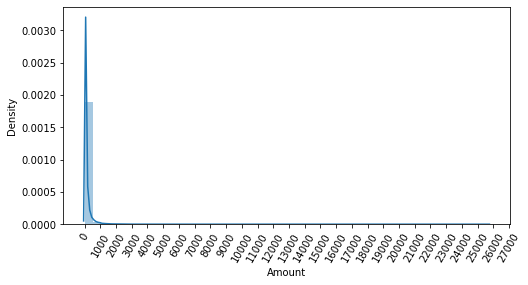

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [20]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [21]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


In [22]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [23]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


### 이상치 데이터 제거 후 모델 학습/예측/평가

<AxesSubplot:>

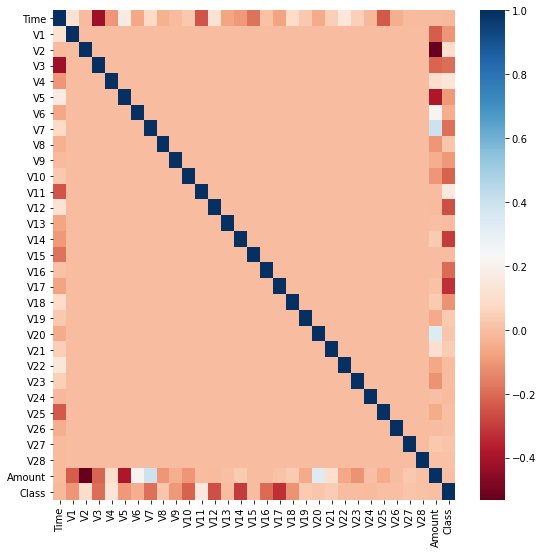

In [24]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [25]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
    

In [26]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [27]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
Name: Class, dtype: int64


In [29]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)


오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    


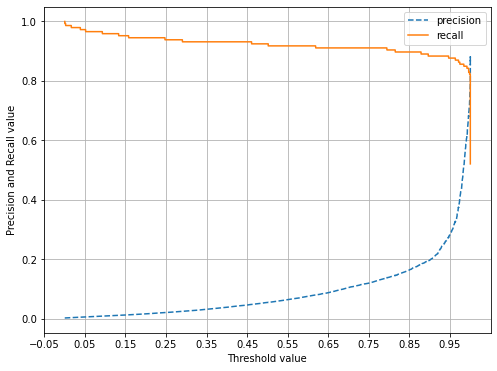

In [31]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [32]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.9814
